In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import acquire
import wrangle

from math import sqrt
from scipy import stats

In [2]:
from sklearn.linear_model import LinearRegression

In [4]:
df = acquire.get_zillow_data()

In [5]:
df.head()

,Unnamed: 0,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,assessmentyear,landtaxvaluedollarcnt,lotsizesquarefeet
0,0,10759547,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,2015.0,27516.0,4083.0
1,1,11193347,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,2016.0,10.0,11975.0
2,2,11215747,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,2016.0,10.0,9403.0
3,3,11229347,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,2016.0,2108.0,3817.0
4,4,11324547,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,2016.0,74104.0,9826.0


In [7]:
df = wrangle.wrangle_zillow(df)

In [8]:
df.head()

,Unnamed: 0,parcelid,bedrooms,bathrooms,square_feet,value,year,tax,fips,assessmentyear,landtaxvaluedollarcnt,lotsizesquarefeet,county
4,4,11324547,4.0,2.0,3633,296425,2005,6941.39,6037,2016.0,74104.0,9826.0,los_angeles
7,7,11585547,3.0,2.0,2077,646760,1926,7924.68,6037,2016.0,436568.0,6490.0,los_angeles
18,18,12716947,3.0,1.0,1244,169471,1950,2532.88,6037,2016.0,61431.0,6021.0,los_angeles
19,19,12757147,3.0,2.0,1300,233266,1950,3110.99,6037,2016.0,155851.0,4917.0,los_angeles
20,20,12757947,3.0,2.0,1222,290492,1951,3870.25,6037,2016.0,172653.0,5500.0,los_angeles


In [9]:
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.3, random_state=123)

In [10]:
train.head()

,Unnamed: 0,parcelid,bedrooms,bathrooms,square_feet,value,year,tax,fips,assessmentyear,landtaxvaluedollarcnt,lotsizesquarefeet,county
451021,451021,14320758,4.0,2.0,2295,661914,1977,6956.64,6059,2016.0,479253.0,5890.0,orange
2047707,2047707,11276175,4.0,3.0,1914,152282,1996,2691.01,6037,2016.0,33100.0,5656.0,los_angeles
48623,48623,12495729,3.0,1.0,1118,558387,1950,6740.91,6037,2016.0,446710.0,10157.0,los_angeles
919293,919293,11936247,5.0,1.0,2034,273112,1901,3345.13,6037,2016.0,271659.0,4785.0,los_angeles
254952,254952,13000978,3.0,1.0,1314,276333,1950,4151.61,6037,2016.0,208973.0,5182.0,los_angeles


In [21]:
model = train[['value','square_feet']]
model

,value,square_feet
451021,661914,2295
2047707,152282,1914
48623,558387,1118
919293,273112,2034
254952,276333,1314
...,...,...
102510,477709,1669
1976504,1400549,4949
1202344,228986,1159
1632452,170266,3023


In [22]:
y = model['value']
X = model['square_feet']

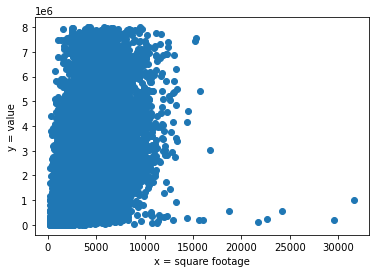

In [23]:
plt.scatter(X, y)
plt.xlabel('x = square footage')
plt.ylabel('y = value');

In [24]:
baseline = y.mean()
baseline 

443588.03698003414

In [26]:
model['baseline'] = model.value.mean()
model.head()

,value,square_feet,baseline
451021,661914,2295,443588.03698
2047707,152282,1914,443588.03698
48623,558387,1118,443588.03698
919293,273112,2034,443588.03698
254952,276333,1314,443588.03698


In [27]:
lm = LinearRegression(normalize=True)

lm.fit(model[['square_feet']], model.value)

model['yhat'] = lm.predict(model[['square_feet']])

model

,value,square_feet,baseline,yhat
451021,661914,2295,443588.03698,5.966974e+05
2047707,152282,1914,443588.03698,4.669495e+05
48623,558387,1118,443588.03698,1.958753e+05
919293,273112,2034,443588.03698,5.078150e+05
254952,276333,1314,443588.03698,2.626222e+05
...,...,...,...,...
102510,477709,1669,443588.03698,3.835159e+05
1976504,1400549,4949,443588.03698,1.500505e+06
1202344,228986,1159,443588.03698,2.098376e+05
1632452,170266,3023,443588.03698,8.446145e+05


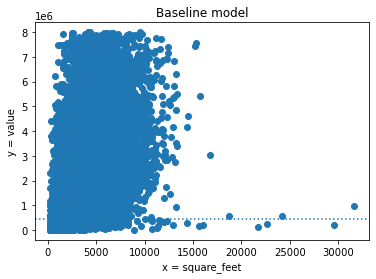

In [28]:
plt.scatter(model.square_feet, model.value)
plt.axhline(model.value.mean(), ls = ':')
plt.xlabel('x = square_feet')
plt.ylabel('y = value')
plt.title('Baseline model');

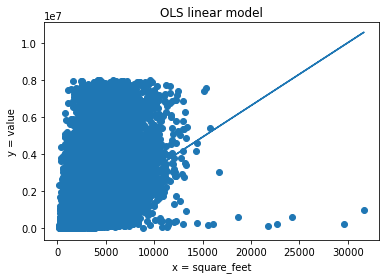

In [29]:
plt.scatter(model.square_feet, model.value)
plt.plot(model.square_feet, model.yhat)
plt.xlabel('x = square_feet')
plt.ylabel('y = value')
plt.title('OLS linear model');

In [30]:
model['residual'] = model.value - model.yhat
model['baseline_residual'] = model.value - model.baseline

In [31]:
model

,value,square_feet,baseline,yhat,residual,baseline_residual
451021,661914,2295,443588.03698,5.966974e+05,65216.643881,218325.96302
2047707,152282,1914,443588.03698,4.669495e+05,-314667.507099,-291306.03698
48623,558387,1118,443588.03698,1.958753e+05,362511.739147,114798.96302
919293,273112,2034,443588.03698,5.078150e+05,-234702.971357,-170476.03698
254952,276333,1314,443588.03698,2.626222e+05,13710.814192,-167255.03698
...,...,...,...,...,...,...
102510,477709,1669,443588.03698,3.835159e+05,94193.149095,34120.96302
1976504,1400549,4949,443588.03698,1.500505e+06,-99956.207296,956960.96302
1202344,228986,1159,443588.03698,2.098376e+05,19148.372192,-214602.03698
1632452,170266,3023,443588.03698,8.446145e+05,-674348.505952,-273322.03698


In [32]:
model.residual.sum(), model.baseline_residual.sum()

(-4.4852495193481445e-05, -1.004338264465332e-05)

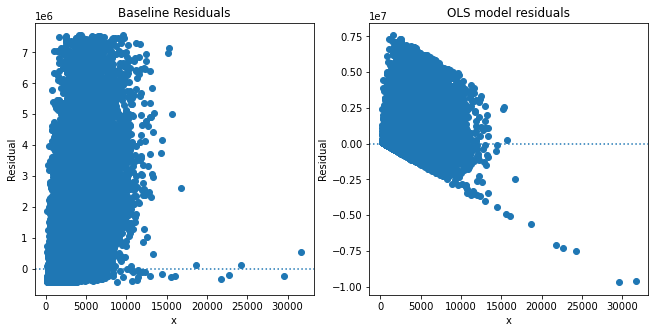

In [33]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(model.square_feet, model.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(model.square_feet, model.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [35]:
model['residual^2'] = model.residual**2
model['baseline_residual^2'] = model.baseline_residual**2

model.head()

,value,square_feet,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
451021,661914,2295,443588.03698,596697.356119,65216.643881,218325.96302,4.253211e+09,4.766623e+10
2047707,152282,1914,443588.03698,466949.507099,-314667.507099,-291306.03698,9.901564e+10,8.485921e+10
48623,558387,1118,443588.03698,195875.260853,362511.739147,114798.96302,1.314148e+11,1.317880e+10
919293,273112,2034,443588.03698,507814.971357,-234702.971357,-170476.03698,5.508548e+10,2.906208e+10
254952,276333,1314,443588.03698,262622.185808,13710.814192,-167255.03698,1.879864e+08,2.797425e+10


### SSE (Sum of Squared Errors)

In [37]:
SSE = model['residual^2'].sum()
SSE_baseline = model['baseline_residual^2'].sum()
SSE, SSE_baseline

(1.724132941512661e+17, 2.808871735867613e+17)

### TSS (total sum of squared errors)

In [41]:
TSS = SSE_baseline =   model['baseline_residual^2'].sum()
TSS

2.808871735867613e+17

### ESS (explained sum of squared errors)

In [43]:
ESS = TSS - SSE
ESS


1.084738794354952e+17

### MSE (Mean Squared Error)

In [38]:
MSE = SSE/len(model)
MSE_baseline = SSE_baseline/len(model)

MSE, MSE_baseline

(145321819308.49857, 236751088638.43054)

### RMSE (Root Mean Squared Error)

In [39]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)

RMSE, RMSE_baseline

(381210.9905400139, 486570.7437140365)

#### Instruction: 
Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [44]:
if SSE >= TSS:
    print("The model does not perform better than the baseline model")
else:
    print("The model performs better than the baseline model")

The model performs better than the baseline model
